In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [66]:
#adding the data to the model(data collection and processing)
car_df = pd.read_csv("car data.csv")

In [67]:
car_df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [68]:
car_df.shape

(301, 9)

In [69]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [70]:
#checking the datatype of each column 
print(car_df.dtypes)


Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


In [71]:
#checking
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [72]:
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### Exploratory data analysis

In [73]:
#checking the distribution of categorical data
print(car_df.Fuel_Type.value_counts())
print(car_df.Seller_Type.value_counts())
print(car_df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [74]:
#change the char(string) values to numeric data(encoding)
car_df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
car_df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
car_df.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

C:\Users\arpit\AppData\Local\Temp\ipykernel_15796\2914736955.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
C:\Users\arpit\AppData\Local\Temp\ipykernel_15796\2914736955.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
C:\Users\arpit\AppData\Local\Temp\ipykernel_15796\2914736955.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fu

In [75]:
#checking the encoding
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [76]:
#Splitting the data into training data and test data
X = car_df.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_df['Selling_Price']

In [77]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [78]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [79]:
#splittting the data and target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(270, 7)
(31, 7)
(270,)
(31,)


### Model Training

In [81]:
#Linear Regression Model
lin_reg_model = LinearRegression()

In [82]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [83]:
#Model Evaluation
training_data_prediction = lin_reg_model.predict(X_train)

In [84]:
#compare the predicted values with actual values by evaluating varioues types of error
error_score1 = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error:", error_score1)

R squared error: 0.8799451660493708


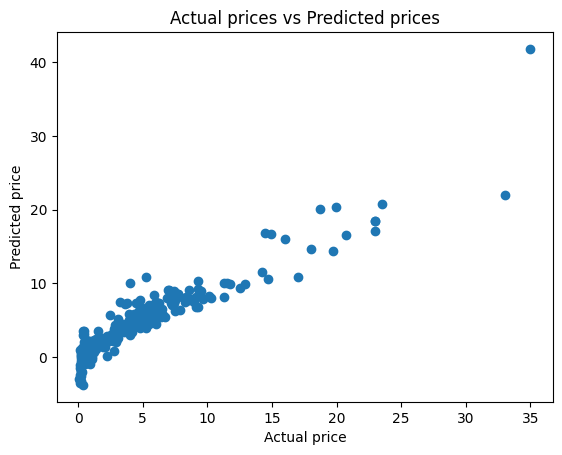

In [85]:
#Visualize the actual price and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual prices vs Predicted prices')
plt.show()

In [86]:
#Prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [87]:
#compare the predicted values with actual values by evaluating varioues types of error
error_score2 = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:", error_score2)

R squared error: 0.8365766715026374


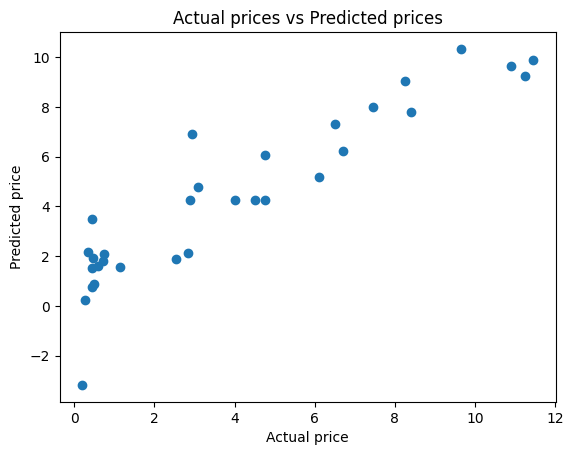

In [88]:
#Visualize the actual price and predicted prices
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual prices vs Predicted prices')
plt.show()

### Lasso regression model

In [89]:
#Lasso regression model
lass_reg_model = Lasso()


In [90]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [91]:
#Model Evaluation
training_data_prediction = lass_reg_model.predict(X_train)

In [92]:
#compare the predicted values with actual values by evaluating varioues types of error
error_score1 = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error:", error_score1)

R squared error: 0.8427856123435794


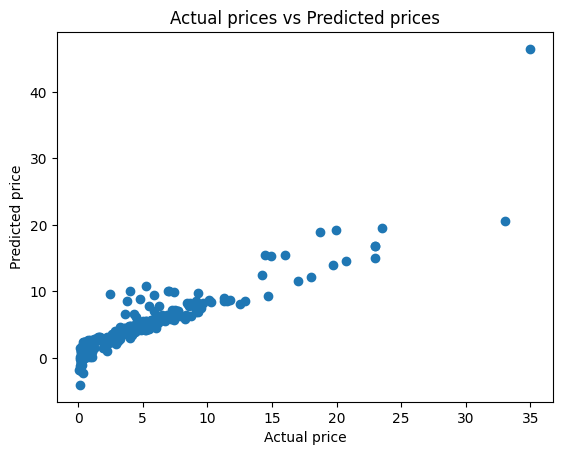

In [93]:
#Visualize the actual price and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual prices vs Predicted prices')
plt.show()

In [94]:
#Prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [95]:
#compare the predicted values with actual values by evaluating varioues types of error
error_score2 = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:", error_score2)

R squared error: 0.8709167941173195


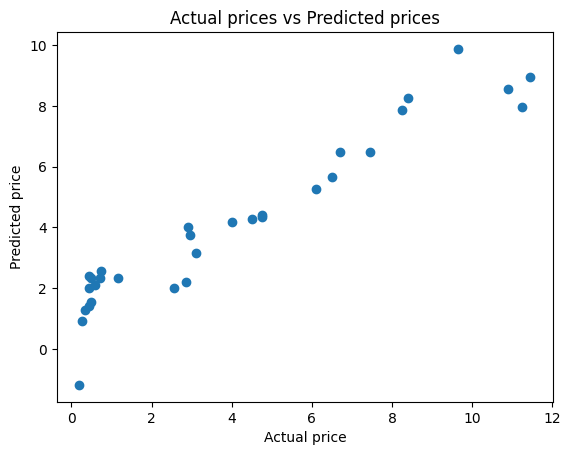

In [96]:
#Visualize the actual price and predicted prices
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual prices vs Predicted prices')
plt.show()